# Customer Segmentation and Recommender System 

In [157]:
# import libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [158]:
# read the datasets
cust = pd.read_csv('customers_dataset.csv')
geo = pd.read_csv('geolocation_dataset.csv')
od_items = pd.read_csv('order_items_dataset.csv')
od_payment = pd.read_csv('order_payments_dataset.csv')
od_review = pd.read_csv('order_reviews_dataset.csv')
orders = pd.read_csv('orders_dataset.csv')
product_cat = pd.read_csv('product_category_name_translation.csv')
products = pd.read_csv('products_dataset.csv')
sellers = pd.read_csv('sellers_dataset.csv')

## EDA

In [159]:
# top 5 rows
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [160]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [161]:
od_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [162]:
od_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [163]:
od_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [164]:
od_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [165]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [166]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#Preprocessing

The common column in both orders table and customer table is customer_id. customer_id is used to join the tables.

In [167]:
# merge orders and cust
order_cust= pd.merge(orders,cust,on='customer_id',how='inner')

In [168]:
# get extra information about the dataset
order_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


In [169]:
# check for null values
order_cust.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [170]:
df= pd.merge(order_cust,od_items,on='order_id',how='inner')

In [171]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   customer_unique_id             112650 non-null  object 
 9   customer_zip_code_prefix       112650 non-null  int64  
 10  customer_city                  112650 non-null  object 
 11  customer_state                 112650 non-null  object 
 12  order_item_id                 

In [173]:
#dropping the columns name customer_id , 'seller_id','shipping_limit_date','customer_zip_code_prefix as they are not of our use in the analysis
df = df.drop(['customer_id', 'seller_id','shipping_limit_date','customer_zip_code_prefix'], axis = 1)
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_status                   112650 non-null  object 
 2   order_purchase_timestamp       112650 non-null  object 
 3   order_approved_at              112635 non-null  object 
 4   order_delivered_carrier_date   111456 non-null  object 
 5   order_delivered_customer_date  110196 non-null  object 
 6   order_estimated_delivery_date  112650 non-null  object 
 7   customer_unique_id             112650 non-null  object 
 8   customer_city                  112650 non-null  object 
 9   customer_state                 112650 non-null  object 
 10  order_item_id                  112650 non-null  int64  
 11  product_id                     112650 non-null  object 
 12  price                         

In [175]:
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

For a company, only deliverd products are beneficial. Rest of the order status like shipped , canceled , unavailable are not of use.

In [176]:
# filter data with order status as 'delivered'
df=df[df['order_status']=='delivered']
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


Given that every record consistently indicates the order status as "delivered," it is recommended to eliminate the order status column from the dataset.

In [177]:
# drop order status
df.drop(columns=['order_status'],inplace=True)

# Check Null values

In [178]:
# check for the null values
df.isna().sum()

order_id                          0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_city                     0
customer_state                    0
order_item_id                     0
product_id                        0
price                             0
freight_value                     0
dtype: int64

It can be seen that the order_approved_at variable contains a missing value indicating that a purchase is not approved by Olist.
Meanwhile, missing value in order_delivered_carrier_date and order_delivered_customer_date indicates product arrival information that was not inputted into the dataset.

In [179]:
# percentage of null values
(df.isna().sum()/ df.shape[0]).to_frame('percentage of missings')

,percentage of missings
order_id,0.000000
order_purchase_timestamp,0.000000
order_approved_at,0.000136
order_delivered_carrier_date,0.000018
order_delivered_customer_date,0.000073
order_estimated_delivery_date,0.000000
customer_unique_id,0.000000
customer_city,0.000000
customer_state,0.000000
order_item_id,0.000000


It can be seen that the percentage of missing data in this variable is very small.



#Drop Null Values

In [180]:
# drop all the rows containing null values
df.dropna(inplace=True)

In [181]:
# check the null values
df.isna().sum()

order_id                         0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
dtype: int64

# Duplicate Detection

In [182]:
# check for the duplicate values
df.duplicated().sum()

0

There are no duplicated records.

#Descriptive Statistics

In [183]:
# use the describe() function
df.describe()

,order_item_id,price,freight_value
count,110173.000000,110173.000000,110173.000000
mean,1.198216,119.978575,19.949051
std,0.706743,182.314081,15.699528
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.900000,16.260000
75%,1.000000,134.170000,21.150000
max,21.000000,6735.000000,409.680000


#Data Transformation

In [184]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110173 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110173 non-null  object 
 1   order_purchase_timestamp       110173 non-null  object 
 2   order_approved_at              110173 non-null  object 
 3   order_delivered_carrier_date   110173 non-null  object 
 4   order_delivered_customer_date  110173 non-null  object 
 5   order_estimated_delivery_date  110173 non-null  object 
 6   customer_unique_id             110173 non-null  object 
 7   customer_city                  110173 non-null  object 
 8   customer_state                 110173 non-null  object 
 9   order_item_id                  110173 non-null  int64  
 10  product_id                     110173 non-null  object 
 11  price                          110173 non-null  float64
 12  freight_value                 

The columns order_purchase_timestamp,order_approved_at,order_delivered_carrier_date ,order_delivered_customer_date,order_estimated_delivery_date are date and time. Therefore, the columns from 1 to 5 are transformed into datetime data type.

In [185]:
# change the data type to datetime
#When set to 'coerce', any values that cannot be converted to datetime will be replaced with a NaT (Not-a-Time) value
df.iloc[:,1:6]=df.iloc[:,1:6].apply(pd.to_datetime, errors='coerce')

The above can be done this way too.

df.iloc[:, 1:6] = df.iloc[:, 1:6].apply(lambda x: pd.to_datetime(x, errors='coerce'))


In [186]:
# change the data type to string
df['order_id']=df['order_id'].astype('str')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110173 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110173 non-null  object        
 1   order_purchase_timestamp       110173 non-null  datetime64[ns]
 2   order_approved_at              110173 non-null  datetime64[ns]
 3   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 4   order_delivered_customer_date  110173 non-null  datetime64[ns]
 5   order_estimated_delivery_date  110173 non-null  datetime64[ns]
 6   customer_unique_id             110173 non-null  object        
 7   customer_city                  110173 non-null  object        
 8   customer_state                 110173 non-null  object        
 9   order_item_id                  110173 non-null  int64         
 10  product_id                     110173 non-null  object        
 11  

In [188]:
df['order_purchase_timestamp'].dt.year.unique()

array([2017, 2018, 2016], dtype=int64)

#Create new columns.

In [189]:
# .strftime() is used to format datetime values as strings.

# %Y is used for year( 2016)
df['purchase_year'] = df['order_purchase_timestamp'].dt.strftime('%Y')

# %b for month abbr (Jan)
df['purchase_month'] = df['order_purchase_timestamp'].dt.strftime('%b')

# %Y-%b for YearMonth (2016-Jan)
df['purchase_yearmonth'] = df['order_purchase_timestamp'].dt.strftime('%Y-%b')

# %a for weekday abbr( Mon)
df['purchase_dayofweek'] = df['order_purchase_timestamp'].dt.strftime('%a')

In [190]:
# Define the bin edges and labels for the purchase periods
bin_edges = [0, 4, 8, 12, 16, 20, 24]
bin_labels = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']

# Assign the purchase periods based on the hour of order_purchase_timestamp
df['purchase_period'] = pd.cut(df['order_purchase_timestamp'].dt.hour, bins=bin_edges, labels=bin_labels)

In [191]:
# create a column for month number
df['month_number']=df['order_purchase_timestamp'].dt.strftime('%m')

In [192]:
df.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,purchase_year,purchase_month,purchase_yearmonth,purchase_dayofweek,purchase_period,month_number
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,2017,Oct,2017-Oct,Mon,Morning,10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,2018,Jul,2018-Jul,Tue,Evening,07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,2018,Aug,2018-Aug,Wed,Early Morning,08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,2017,Nov,2017-Nov,Sat,Evening,11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,2018,Feb,2018-Feb,Tue,Night,02


# Data Visualisation


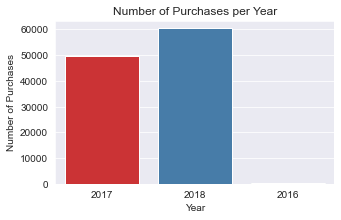

In [193]:
# a barplot to show the number of purchases
plt.figure(figsize=(5,3))

sns.countplot(x='purchase_year',
            data=df)
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases per Year')
plt.show()

In [194]:
# trend of shopping from 2016-2018

In [195]:
# %Y-%b for YearMonth (2016-Jan)
df['purchase_yearmonth'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [196]:
purchase_month_year=df.groupby(['purchase_yearmonth'])['price'].count()

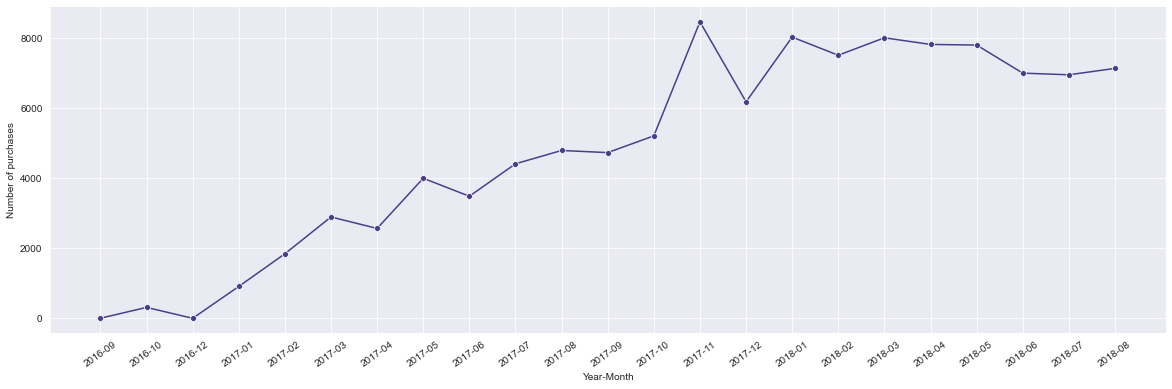

In [197]:
plt.figure(figsize=(20,6))
plt.grid(True)
# a line plot to show the trend of shopping
sns.lineplot(
            x=purchase_month_year.index,
            y=purchase_month_year.values,
            marker='o',
            color='darkslateblue')
plt.xlabel('Year-Month')
plt.ylabel('Number of purchases')
plt.xticks(rotation=35)
sns.despine()
plt.show()

#Shopping tendency as per time of the day

In [198]:
df.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,purchase_year,purchase_month,purchase_yearmonth,purchase_dayofweek,purchase_period,month_number
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,2017,Oct,2017-10,Mon,Morning,10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,2018,Jul,2018-07,Tue,Evening,07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,2018,Aug,2018-08,Wed,Early Morning,08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,2017,Nov,2017-11,Sat,Evening,11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,2018,Feb,2018-02,Tue,Night,02


Tendency of Purchases in a Day

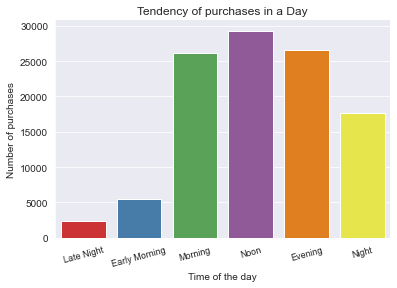

In [199]:
# create a countplot()

sns.countplot(data=df,
              x='purchase_period')

sns.despine()
plt.title('Tendency of purchases in a Day')
plt.ylabel('Number of purchases')
plt.xlabel('Time of the day')
plt.xticks(rotation=15,fontsize=9)
plt.show()

Tendency of purchase in a Week

In [200]:
# create a dataframe
# count of purchases on day of a week
purchase_day=df.groupby(['purchase_dayofweek'])[['order_id']].count().rename(columns={'order_id':'count'}).reset_index()

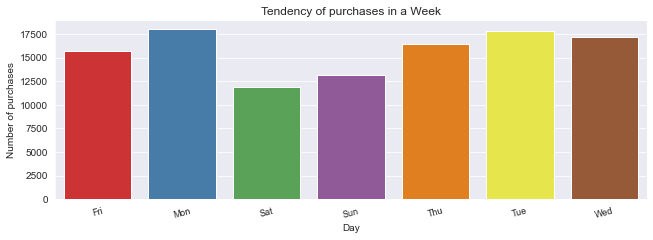

In [201]:
# create a countplot()

sns.set_palette('Set1')
sns.catplot(data=purchase_day,
              x='purchase_dayofweek',
            y='count',
            kind='bar',
            aspect=3,
            height=3)

sns.despine()
plt.title('Tendency of purchases in a Week')
plt.ylabel('Number of purchases')
plt.xlabel('Day')
plt.xticks(rotation=15,fontsize=9)
plt.show()

## Most number of Customers state-wise


In [202]:
# top 5 states with most number of customers
top5_state=df['customer_state'].value_counts().head()
top5_state

SP    46435
RJ    14140
MG    12913
RS     6131
PR     5649
Name: customer_state, dtype: int64

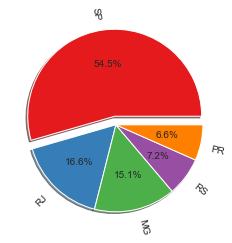

In [203]:
# plot a pie chart
plt.pie(top5_state,
        labels=top5_state.index,
        autopct='%.1f%%',
        rotatelabels=True,
        explode=(0.1,0.0,0.0,0.0,0.0),
        shadow=True,
        )

plt.show()

Similarly, we can plot a graph for the cities.

## States with least number of Customers.

In [204]:
bottom5_state=df['customer_state'].value_counts().tail()
bottom5_state

RO    273
AM    163
AC     91
AP     81
RR     46
Name: customer_state, dtype: int64

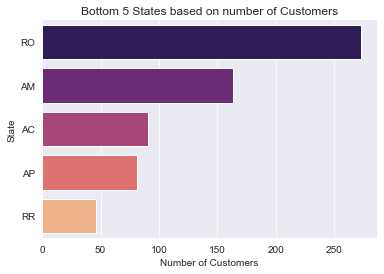

In [205]:
# a barplot to show the states with least number of customers

sns.barplot(y=bottom5_state.index,
            x=bottom5_state.values,
            palette='magma')

plt.title('Bottom 5 States based on number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('State')
sns.despine()
plt.show()

#Some Intermediate Data Analysis

## Economy of E-Commerce Company

In [206]:
# total economy per month per year
economy=df.groupby(['purchase_year','purchase_yearmonth'],as_index=False).agg({
    'order_id':'count',
    'price':'sum',
    'freight_value':'sum'
})
economy.head()

,purchase_year,purchase_yearmonth,order_id,price,freight_value
0,2016,2016-09,3,134.97,8.49
1,2016,2016-10,313,40325.11,6165.55
2,2016,2016-12,1,10.90,8.72
3,2017,2017-01,911,111712.47,15654.97
4,2017,2017-02,1845,232638.86,36760.79


In [207]:
# price per order
economy['price_per_order']=economy['price']/economy['order_id']

# fright value per ordre
economy['freight_per_order']= economy['freight_value']/economy['order_id']

economy.head()


,purchase_year,purchase_yearmonth,order_id,price,freight_value,price_per_order,freight_per_order
0,2016,2016-09,3,134.97,8.49,44.990000,2.830000
1,2016,2016-10,313,40325.11,6165.55,128.834217,19.698243
2,2016,2016-12,1,10.90,8.72,10.900000,8.720000
3,2017,2017-01,911,111712.47,15654.97,122.626202,17.184380
4,2017,2017-02,1845,232638.86,36760.79,126.091523,19.924547


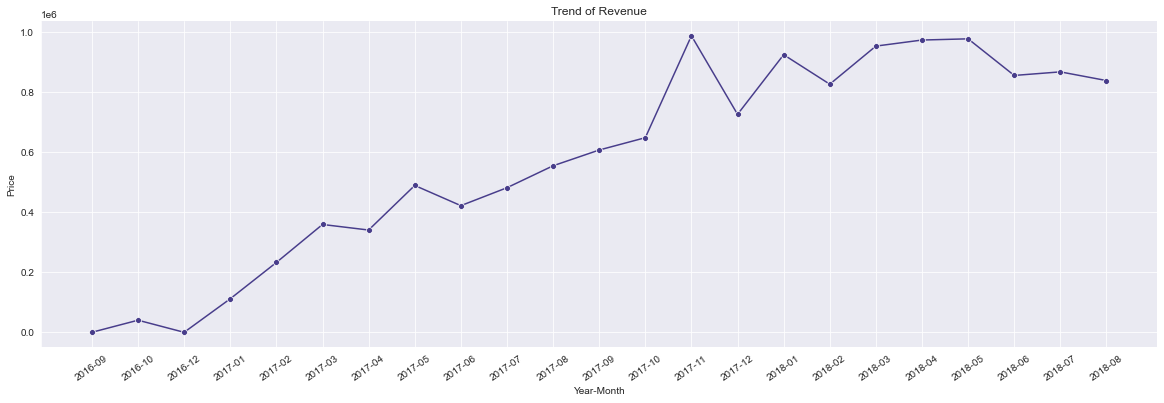

In [208]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
# a line plot to show the trend of income
sns.lineplot(data=economy,
            x='purchase_yearmonth',
            y='price',
            marker='o',
            color='darkslateblue')
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Trend of Revenue')
plt.xticks(rotation=35)
sns.despine()
plt.show()

## Total revenue generated per state

In [209]:
df.columns

Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price',
       'freight_value', 'purchase_year', 'purchase_month',
       'purchase_yearmonth', 'purchase_dayofweek', 'purchase_period',
       'month_number'],
      dtype='object')

In [210]:
purchase_price_state=df.groupby('customer_state',as_index=False)[['price']].sum().sort_values('price')

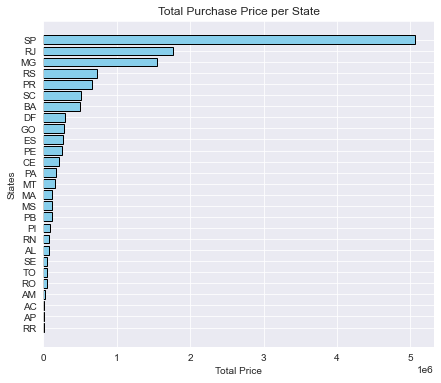

In [211]:
plt.figure(figsize=(7,6))
plt.barh(y=purchase_price_state['customer_state'],
         width=purchase_price_state['price'],
         color='skyblue',
         edgecolor='black'
         )

plt.title('Total Purchase Price per State')
plt.xlabel('Total Price')
plt.ylabel('States')
plt.show()

## Average Purchase price per State

In [212]:
avg_purchase_price_state=df.groupby('customer_state',as_index=False)[['price']].mean().sort_values('price')

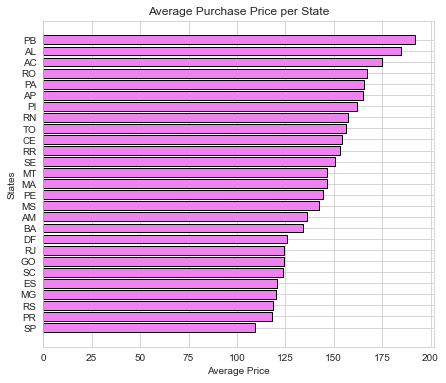

In [213]:
plt.figure(figsize=(7,6))

sns.set_style('whitegrid')
plt.barh(y=avg_purchase_price_state['customer_state'],
         width=avg_purchase_price_state['price'],
         color='violet',
         edgecolor='black'
         )

plt.title('Average Purchase Price per State')

plt.xlabel('Average Price')
plt.ylabel('States')
plt.show()

In [214]:
## Trend of Average Shipping Charge

In [215]:
# remove data of 2016 as it is quite low as compared to 2017 and 2018
ship_trend=economy[economy['purchase_year']!='2016']

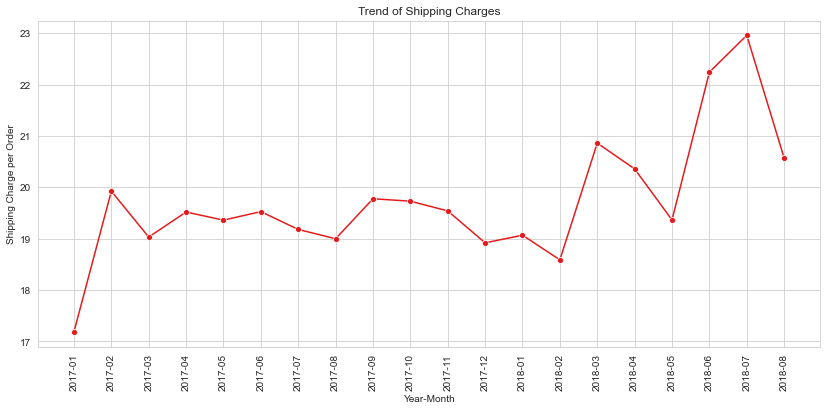

In [216]:
# plot a line plot to show the trend of shipping charges
plt.figure(figsize=(14,6))
sns.lineplot(data=ship_trend,
             x='purchase_yearmonth',
             y='freight_per_order',
             marker='o')
plt.xticks(rotation=90)
plt.title('Trend of Shipping Charges')
plt.xlabel('Year-Month')
plt.ylabel('Shipping Charge per Order')
plt.show()

## Total Shipping Charge per State

In [217]:
# total shipment charge per state
ship_state=df.groupby(['customer_state'])[['freight_value']].sum().sort_values(by='freight_value')

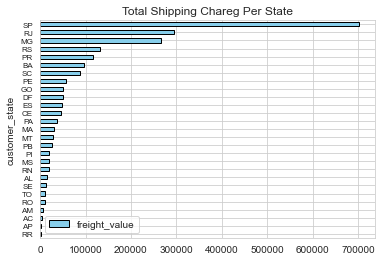

In [218]:

# a bar plot to show the total shipment charge per state
ship_state.plot(kind='barh',color='skyblue',
                edgecolor='black')
plt.yticks(fontsize=8)
plt.title('Total Shipping Chareg Per State')
plt.show()

# Delivery Analysis

In [219]:
# create a copy of df dataframe
delivery= df.copy()

In [220]:
# time to deliver the product
# delivery date - purchase date
# convert the time into hours

delivery['time_to_deliver']=(delivery['order_delivered_customer_date']- delivery['order_purchase_timestamp'])/np.timedelta64(1, 'h')

In [221]:
# difference between estimated and actual delivery
# estimated date - delivery date
# convert the time into hours

delivery['diff_estimate_delivery']=(delivery['order_estimated_delivery_date']- delivery['order_delivered_customer_date'])/np.timedelta64(1, 'h')

In [222]:
# difference between estimate and delivery in hours
delivery['diff_estimate_delivery']

0         170.579722
1         128.537500
2         413.891944
3         311.521667
4         221.716111
             ...    
112645     30.367778
112646    132.595278
112647    480.451667
112648    480.451667
112649    418.858333
Name: diff_estimate_delivery, Length: 110173, dtype: float64

The values are positive. It implies that the estimate delivery date is greater than actual delivery date.
All products are deliverd before estimated delivery date.

In [223]:
# use groupby to group the data based on State
# get mean of shipping price, mean of time to deliver, mean of diff_estimate_delivery

state_delivery=delivery.groupby('customer_state',as_index=False).agg({'freight_value':'mean','time_to_deliver':'mean','diff_estimate_delivery':'mean'})
state_delivery.head()

,customer_state,freight_value,time_to_deliver,diff_estimate_delivery
0,AC,40.047912,497.173199,487.988181
1,AL,35.870656,587.739403,193.376353
2,AM,33.310613,633.383212,461.424899
3,AP,34.160494,676.943035,426.441255
4,BA,26.487556,461.942831,246.925482


In [224]:
# highest average shipping price
state_shipping=state_delivery[['customer_state','freight_value']].sort_values(by='freight_value',ascending=False)
state_shipping.head()

,customer_state,freight_value
14,PB,43.091689
21,RR,43.088043
20,RO,41.330549
0,AC,40.047912
16,PI,39.115086


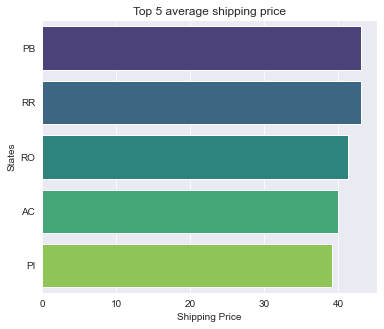

In [225]:
# barplot to show highest average shipping price
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_shipping.head(),
            y='customer_state',
            x='freight_value',
            palette='viridis')

plt.title('Top 5 average shipping price')
plt.xlabel('Shipping Price')
plt.ylabel('States')
sns.despine()
plt.show()

In [226]:
# lowest average shipping price
state_shipping=state_delivery[['customer_state','freight_value']].sort_values(by='freight_value',ascending=False)
state_shipping.tail()

,customer_state,freight_value
6,DF,21.072161
18,RJ,20.912704
10,MG,20.627192
17,PR,20.471816
25,SP,15.114601


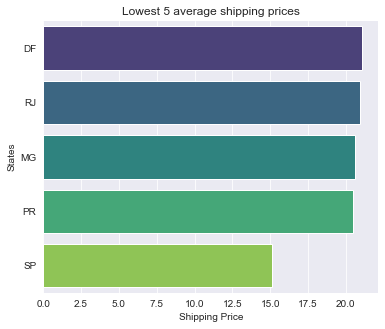

In [227]:
# barplot to show highest average shipping price
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_shipping.tail(),
            y='customer_state',
            x='freight_value',
            palette='viridis')

plt.title('Lowest 5 average shipping prices')
plt.xlabel('Shipping Price')
plt.ylabel('States')
sns.despine()
plt.show()

### Delivery Variance


The difference between the estimated delivery date and the actual delivery date is commonly referred to as the "delivery variance" or "delivery deviation.


In [228]:
# highest average difference between estimate and delivery time
state_diff_estimate_delivery=state_delivery[['customer_state','diff_estimate_delivery']].sort_values(by='diff_estimate_delivery',ascending=False)
state_diff_estimate_delivery.head()

,customer_state,diff_estimate_delivery
0,AC,487.988181
20,RO,464.186358
2,AM,461.424899
3,AP,426.441255
21,RR,422.841002


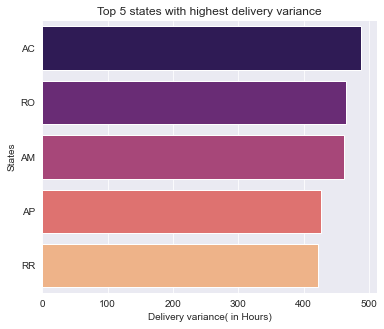

In [229]:
# barplot to show highest average difference between estimate and delivery time
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_diff_estimate_delivery.head(),
            y='customer_state',
            x='diff_estimate_delivery',
            palette='magma')

plt.title('Top 5 states with highest delivery variance')
plt.xlabel('Delivery variance( in Hours)')
plt.ylabel('States')
sns.despine()
plt.show()

In [230]:
# lowest difference between estimate and delivery time
state_diff_estimate_delivery=state_delivery[['customer_state','diff_estimate_delivery']].sort_values(by='diff_estimate_delivery',ascending=False)
state_diff_estimate_delivery.tail()

,customer_state,diff_estimate_delivery
4,BA,246.925482
7,ES,238.781078
24,SE,223.817613
9,MA,220.860777
1,AL,193.376353


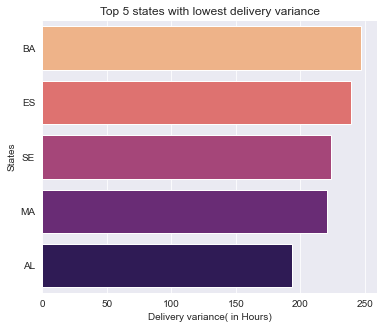

In [231]:
# barplot to show lowest delivery variance
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_diff_estimate_delivery.tail(),
            y='customer_state',
            x='diff_estimate_delivery',
            palette='magma_r')

plt.title('Top 5 states with lowest delivery variance')
plt.xlabel('Delivery variance( in Hours)')
plt.ylabel('States')
sns.despine()
plt.show()

In [232]:
# longest average time to deliver per state
state_time_delivery=state_delivery[['customer_state','time_to_deliver']].sort_values(by='time_to_deliver',ascending=False)
state_time_delivery.head()

,customer_state,time_to_deliver
21,RR,677.544275
3,AP,676.943035
2,AM,633.383212
1,AL,587.739403
13,PA,570.097281


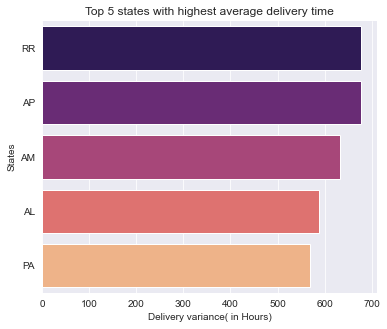

In [233]:
# barplot to show highest average delivery time
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_time_delivery.head(),
            y='customer_state',
            x='time_to_deliver',
            palette='magma')

plt.title('Top 5 states with highest average delivery time')
plt.xlabel('Delivery variance( in Hours)')
plt.ylabel('States')
sns.despine()
plt.show()

In [234]:
# shortest average time to deliver per state
state_time_delivery=state_delivery[['customer_state','time_to_deliver']].sort_values(by='time_to_deliver',ascending=False)
state_time_delivery.tail()

,customer_state,time_to_deliver
23,SC,359.943437
6,DF,311.015835
10,MG,287.556996
17,PR,286.733214
25,SP,209.343141


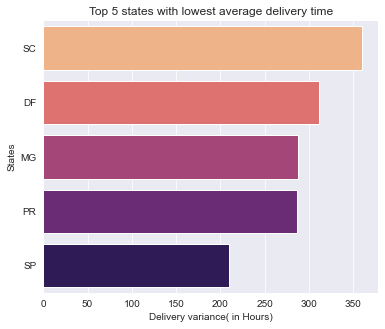

In [235]:
# barplot to show lowest average delivery time
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.barplot(data=state_time_delivery.tail(),
            y='customer_state',
            x='time_to_deliver',
            palette='magma_r')

plt.title('Top 5 states with lowest average delivery time')
plt.xlabel('Delivery variance( in Hours)')
plt.ylabel('States')
sns.despine()
plt.show()

In [236]:
# #cust=pd.read_csv(url1)
# geo=pd.read_csv(url2)
# od_items=pd.read_csv(url3)
# od_payment=pd.read_csv(url4)
# od_review= pd.read_csv(url5)
# orders=pd.read_csv(url6)
# product_cat=pd.read_csv(url7)
# products=pd.read_csv(url8)
# sellers= pd.read_csv(url10)


In [237]:
od_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [238]:
od_payment['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [239]:
payment=df.merge(od_payment,on='order_id',how='inner')
payment.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,...,purchase_year,purchase_month,purchase_yearmonth,purchase_dayofweek,purchase_period,month_number,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,...,2017,Oct,2017-10,Mon,Morning,10,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,...,2017,Oct,2017-10,Mon,Morning,10,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,...,2017,Oct,2017-10,Mon,Morning,10,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,...,2018,Jul,2018-07,Tue,Evening,07,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,...,2018,Aug,2018-08,Wed,Early Morning,08,1,credit_card,3,179.12


In [240]:
payment_mode=payment['payment_type'].value_counts()

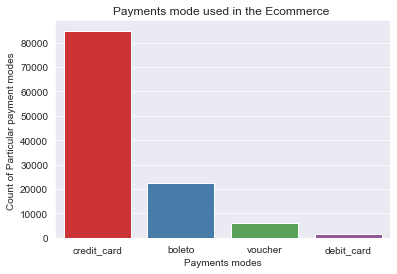

In [241]:
sns.barplot(x=payment_mode.index,y=payment_mode.values)
plt.title("Payments mode used in the Ecommerce ")
plt.xlabel("Payments modes")
plt.ylabel("Count of Particular payment modes ")
plt.show()

# Building Machine Learning Models
In this section, we will create a model that can perform customer segmentation. Customer segmentation itself is an unsupervised problem so that our data does not have a label, but later we ourselves will provide a label. Algorithm that can be used:



*   RFM Segmentation
*   K means






## RFM Segmentation

RFM stands for Recency, Frequency and Monetary. Each factor adjusts to the characteristics of customer. This RFM metric is an important indicator of customer behavior segmentation because frequency and monetary affect customer lifetime value, and recency affects engagement rate.

The RFM Analysis application on this data aims to segment customers, so that e-commerce can apply sales/marketing strategies that suit the characteristics of these customers.

# DataSet Preparation

In [242]:
from datetime import datetime, timedelta

# Modeling
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Evaluation
from sklearn.metrics import silhouette_score

#Scaling
from sklearn.preprocessing import StandardScaler

# Regular Expression
import re

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [243]:
df1=pd.merge(delivery,od_payment,on='order_id',how='inner')

In [244]:
# drop columns
df1= df1.drop(['payment_installments', 'payment_sequential'], axis = 1)


In [245]:
# Group data by customer_unique_id
rfm = df1.groupby(['customer_unique_id']).agg({
    'order_purchase_timestamp': lambda x: (df1['order_purchase_timestamp'].max() - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
})

In [246]:
# rename the columns
rfm.rename(columns={'order_purchase_timestamp':'recency',
                    'order_id':'frequency',
                    'price':'monetary'},inplace=True)

In [247]:
rfm.head()

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
0000f46a3911fa3c0805444483337064,536,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99
0004aac84e0df4da2b147fca70cf8255,287,1,180.00


In [248]:
# For most use cases, people usually look at one year data
rfm = rfm[rfm['recency'] <= 365]

# 5X5X5 RFM Analysis

In [249]:
import pandas as pd
from IPython.display import display, Markdown

# Recency dataframe
recency_data = {
    'Days': ['0-14', '15-30', '31-60', '60-180', '> 180'],
    'R-score': [5, 4, 3, 2, 1]
}

recency_df = pd.DataFrame(recency_data)

# Frequency dataframe
frequency_data = {
    'Frequency': ['> 6', '5 - 6', '3 - 4', '2', '1'],
    'F-score': [5, 4, 3, 2, 1]
}

frequency_df = pd.DataFrame(frequency_data)

# Monetary dataframe
monetary_data = {
    'Monetary': ['>2000', '(1000-2000]', '(500-1000]', '(250-500]', '(0, 250]'],
    'M-score': [5, 4, 3, 2, 1]
}

monetary_df = pd.DataFrame(monetary_data)

# Define the bullet point symbol
bullet = "\u2022"

# Display the dataframes with bullets in front of their names
display(Markdown(f"{bullet} Recency:"))
display(recency_df)

display(Markdown(f"{bullet} Frequency:"))
display(frequency_df)

display(Markdown(f"{bullet} Monetary:"))
display(monetary_df)


• Recency:

,Days,R-score
0,0-14,5
1,15-30,4
2,31-60,3
3,60-180,2
4,> 180,1


• Frequency:

,Frequency,F-score
0,> 6,5
1,5 - 6,4
2,3 - 4,3
3,2,2
4,1,1


• Monetary:

,Monetary,M-score
0,>2000,5
1,(1000-2000],4
2,(500-1000],3
3,(250-500],2
4,"(0, 250]",1


In [250]:
def r_score(x):
    if x <= 14:
        return 5
    elif x <= 30:
        return 4
    elif x <= 60:
        return 3
    elif x <= 180:
        return 2
    else:
        return 1

def f_score(x):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 4:
        return 3
    elif x <= 6:
        return 4
    else:
        return 5

def m_score(x):
    if x <= 250:
        return 1
    elif x <= 500:
        return 2
    elif x <= 1000:
        return 3
    elif x <= 2000:
        return 4
    else:
        return 5

In [251]:
rfm['R_score'] = rfm['recency'].apply(r_score)
rfm['F_score'] = rfm['frequency'].apply(f_score)
rfm['M_score'] = rfm['monetary'].apply(m_score)

# calculate RFM Score
rfm['RFM_score'] = rfm['R_score'] * 100 + rfm['F_score'] * 10 + rfm['M_score']

In [252]:
# Convert the RFM_score into string
rfm['RFM_score'] = rfm['RFM_score'].astype('str')

In [253]:
rfm.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,2,1,1,211
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1,1,211
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,1,1,1,111
0004aac84e0df4da2b147fca70cf8255,287,1,180.00,1,1,1,111
0004bd2a26a76fe21f786e4fbd80607f,145,1,154.00,2,1,1,211


In [254]:
# create pivot tables
# F-R plot: Count the number of users in each F-R pair.
rfm_count = pd.pivot_table(rfm, values='RFM_score', index= ['F_score'],
                    columns=['R_score'], aggfunc='size', fill_value=0)
rfm_count

R_score,1,2,3,4,5
F_score,,,,,
1,29189,21808,4773,3824,2235
2,3875,2904,596,443,250
3,1066,800,154,133,60
4,208,187,28,26,19
5,75,80,14,7,5


In [255]:
# F-R plot: Find the monetary median of users in each F-R pair.
rfm_median = pd.pivot_table(rfm, values='monetary', index= ['F_score'],
                    columns=['R_score'], aggfunc='median', fill_value=0).round(2)
rfm_median

R_score,1,2,3,4,5
F_score,,,,,
1,79.99,84.99,79.90,79.90,72.99
2,139.80,139.80,139.80,142.44,124.89
3,190.70,191.83,205.11,209.97,161.45
4,274.04,334.50,239.75,259.43,360.53
5,814.17,562.95,556.19,1138.30,699.60


In [256]:
# F-R plot: Find the monetary mean of users in each F-R pair.
rfm_mean = pd.pivot_table(rfm, values='monetary', index= ['F_score'],
                    columns=['R_score'], aggfunc='mean', fill_value=0).round(2)
rfm_mean

R_score,1,2,3,4,5
F_score,,,,,
1,128.10,134.71,132.94,129.17,122.35
2,209.98,202.13,211.52,206.21,210.13
3,277.39,285.24,346.41,297.59,212.62
4,410.60,479.38,414.55,459.64,336.53
5,1152.61,996.37,874.74,1328.27,637.42


In [257]:
# F-R plot: Find the monetary sum of users in each F-R pair.
rfm_sum = pd.pivot_table(rfm, values='monetary', index= ['F_score'],
                    columns=['R_score'], aggfunc='sum', fill_value=0).round(0).astype(int)
rfm_sum

R_score,1,2,3,4,5
F_score,,,,,
1,3739223,2937785,634538,493936,273444
2,813690,586989,126064,91352,52533
3,295697,228190,53347,39579,12757
4,85405,89644,11607,11951,6394
5,86446,79709,12246,9298,3187


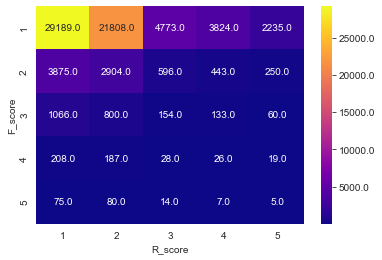

In [258]:
color_map = 'plasma'
# Create the heatmap with the specified color map and formatted annotations
sns.heatmap(data=rfm_count,
            annot=True,
            fmt='.1f',  # Format the annotations with one decimal place
            cmap=color_map,  # Set the color map
            cbar_kws={'format': '%.1f'}  # Format the color bar values with one decimal place
            )
plt.show()

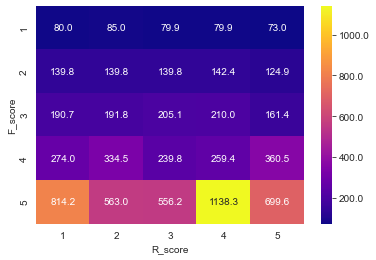

In [259]:
color_map = 'plasma'
# Create the heatmap with the specified color map and formatted annotations
sns.heatmap(data=rfm_median,
            annot=True,
            fmt='.1f',  # Format the annotations with one decimal place
            cmap=color_map,  # Set the color map
            cbar_kws={'format': '%.1f'}  # Format the color bar values with one decimal place
            )
plt.show()

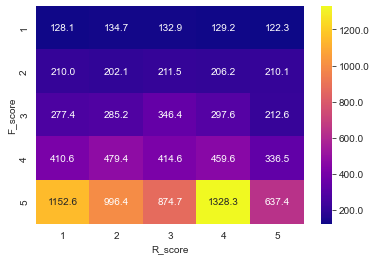

In [260]:
color_map = 'plasma'
# Create the heatmap with the specified color map and formatted annotations
sns.heatmap(data=rfm_mean,
            annot=True,
            fmt='.1f',  # Format the annotations with one decimal place
            cmap=color_map,  # Set the color map
            cbar_kws={'format': '%.1f'}  # Format the color bar values with one decimal place
            )
plt.show()

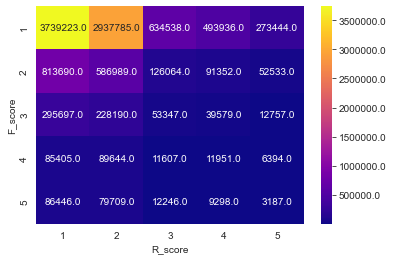

In [261]:
color_map = 'plasma'
# Create the heatmap with the specified color map and formatted annotations
sns.heatmap(data=rfm_sum,
            annot=True,
            fmt='.1f',  # Format the annotations with one decimal place
            cmap=color_map,  # Set the color map
            cbar_kws={'format': '%.1f'}  # Format the color bar values with one decimal place
            )
plt.show()

Short Summary:
1. High-frequency buyers (especially F-score = 5, frequency > 6/year) contribute the most to the company.

2. High frequency and most recent buyers (high F and R scores) are the ones we should definitely keep.

3. Medium Frequency (F-score = 3) are the groups we want to save (give incentives), especially for those ones who have R-score > 2.

4. The number of new customers is quite low, so the company should lunch some customer acquisition campaigns.
5. There are quite some low frequency and low recency score buyers, which means the customers may lose interest in the website or products.

The company should dive deep to investigate and save this group because new customer acquisitions are expensive.

# Customer Segmentation

**Assign Customer Segmentation based on RFM Scores**

It might not be practical to work on 5x5x5 = 125 RFM group individually. Some groups are too small, so it is hard for marketers to work on too many groups. Therefore, we combine some of the groups based on their RFM properties. We further assign customer segmentation for marketing purposes to give the marketers a clear goal to work on.

**Segment Description**



*  **VIPs:** For those whose recent purchases are within 180 days and have bought more than 5 times in a year.
*   **Potential loyalists:** For those whose recent purchases are within 180 days and have bought 3-4 times in a year.
*   **Need to focus:** For those who have bought only 2 times in the past year.
*   **Good old friends:** For those who have bought more than 3 times didn't purchase within 180 days.
*  **New customers:**For those who have only purchased once and their recent purchase is less than 30 days.
*  **Hibernating:** For those who have only purchased once, and their recent purchase has been more than 30 days.




**Actions**



*  **VIPs:** Keep them happy (at any cost).
*   **Potential loyalists:** Should give incentives to increase their tendency to buy more times on the website.
*   **Need to focus:** They have moderate monetary contributions, but the marketer should turn them in the potential groups ASAP; otherwise, they may turn to hibernate.
*   **Good old friends:** They were loyal, but it seems we are losing them. Give them incentives to recall their good memories (recommendation comes in because we have their purchase history) and make them have a recent purchase.
*  **New customers:**Make them want to purchase the second time; otherwise, they'll go hibernating.
*  **Hibernating:** We don't know them much, and they didn't purchase within a month. We need to guess to motivate them to buy another time.





**RFM Group**



*   **VIPs:**25x, 35x, 45x, 55x, 24x, 34x, 44x, 54x, where x = 1...5
*  **Potential loyalists:** 23x, 33x, 43x, 53x, where x = 1...5
*   **Need to focus:** 12x, 22x, 32x, 42x, 52x, where x = 1...5
*   **Good old frends:** 13x, 14x, 15x, where x = 1...5
*   **New customers:** 41x, 51x, where x = 1...5
*   **Hibernating**: 11x, 21x, 31x, where x = 1...5





In [262]:
segmentation = {
    r'[2-5][4-5]': 'VIPs',
    r'[2-5]3': 'Potential loyalists',
    r'[1-5]2': 'Need to focus',
    r'1[3-5]': 'Good old frends',
    r'[4-5]1': 'New customers',
    r'[1-3]1': 'Hibernating',
}

In [263]:
rfm['Segment'] = rfm['R_score'] * 10 + rfm['F_score']
rfm['Segment'] = rfm['Segment'].astype(str)

In [264]:
rfm['Segment'] = rfm['Segment'].replace(segmentation, regex=True)
rfm.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,2,1,1,211,Hibernating
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1,1,211,Hibernating
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,1,1,1,111,Hibernating
0004aac84e0df4da2b147fca70cf8255,287,1,180.00,1,1,1,111,Hibernating
0004bd2a26a76fe21f786e4fbd80607f,145,1,154.00,2,1,1,211,Hibernating


In [265]:
rfm_segment = rfm.groupby('Segment').agg({'recency': ['mean', 'median'],
                                          'frequency': ['mean', 'median'],
                                          'monetary': ['mean', 'median', 'sum', 'count']}).round(0).astype(int)
rfm_segment

recency        frequency        monetary                  \
                       mean median      mean median     mean median      sum   
Segment                                                                        
Good old frends         268    273         4      3      347    216   467548   
Hibernating             189    187         1      1      131     81  7311547   
Need to focus           175    174         2      2      207    140  1670627   
New customers            18     18         1      1      127     79   767380   
Potential loyalists      93     97         3      3      291    195   333873   
VIPs                     95    101         7      6      612    400   224037   

                            
                     count  
Segment                     
Good old frends       1349  
Hibernating          55770  
Need to focus         8068  
New customers         6059  
Potential loyalists   1147  
VIPs                   366

In [266]:
segment_counts=rfm_segment[( 'monetary',  'count')].sort_values()
segment_counts

Segment
VIPs                     366
Potential loyalists     1147
Good old frends         1349
New customers           6059
Need to focus           8068
Hibernating            55770
Name: (monetary, count), dtype: int32

In [267]:
def hbar(data):

    num_of_segment = len(data)

    ax.set_frame_on(False)
    ax.set_yticks(range(num_of_segment))
    ax.set_yticklabels(data.index)

    bars = ax.barh(range(num_of_segment), data, color='silver')

    for i, bar in enumerate(bars):
            value = bar.get_width()
            if data.index[i] in ['VIPs']:
                bar.set_color('firebrick')
            ax.text(value,
                    bar.get_y() + bar.get_height()/2,
                    '{:,} ({:}%)'.format(int(value),int(value*100/data.sum())),
                    va='center',
                    ha='left')


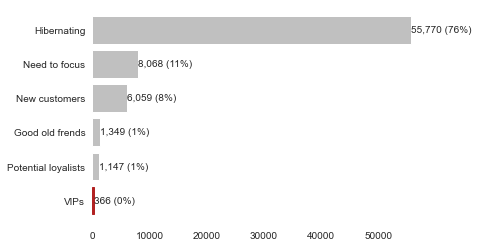

In [268]:
fig, ax = plt.subplots()
hbar(segment_counts)
plt.show()

In [269]:
segment_monetary_sum=rfm_segment[( 'monetary',  'sum')].sort_values()
segment_monetary_sum

Segment
VIPs                    224037
Potential loyalists     333873
Good old frends         467548
New customers           767380
Need to focus          1670627
Hibernating            7311547
Name: (monetary, sum), dtype: int32

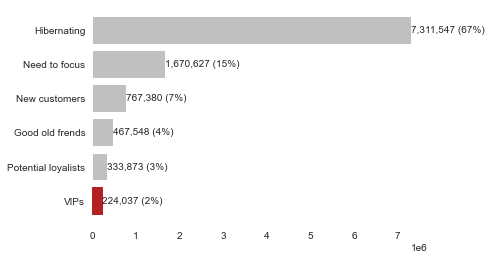

In [270]:
fig, ax = plt.subplots()
hbar(segment_monetary_sum)
plt.show()

**Short Summary:**

*   VIPs are the champian, which contributes the most, but it only contributes 2% of our total customers.

*  Hibernating group has a lot of people (67%). Although they didn't make any recent purchase within 180 days, it accumulated moderate income. However, since we don't know them much, it's better to investigate why they only purchased once and left.
*   
We don't see many new customers joining in (7%), so the customer base is relatively stable.


*  It's good to see we don't have too many people in the "Good old friends" group, which means those who purchased more than three times tend to stay and keep buying within 180 days cycle.

# K Means

In [294]:
x = rfm[['recency', 'frequency', 'monetary']]

In [295]:
#scale
scaler = StandardScaler()

# Data Scale
x_scaled = scaler.fit_transform(x)

In [ ]:
score = []
inertia_score=[]
number_of_clusters = range(2,9)

for i in number_of_clusters:
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)

    label = kmeans.labels_
    inertia=kmeans.inertia_
    inertia_score.append(inertia)
    score.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

In [274]:
for i in range(len(score)):
    print(f'Silhoutte Score of {i+2} Cluster', round(score[i], 3))

Silhoutte Score of 2 Cluster 0.391
Silhoutte Score of 3 Cluster 0.428
Silhoutte Score of 4 Cluster 0.448
Silhoutte Score of 5 Cluster 0.456
Silhoutte Score of 6 Cluster 0.365
Silhoutte Score of 7 Cluster 0.377
Silhoutte Score of 8 Cluster 0.404


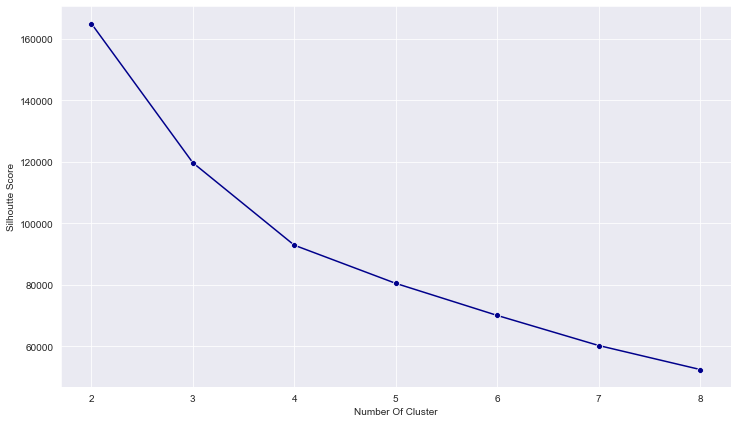

In [275]:
plt.figure(figsize = (12, 7))

sns.lineplot(x=number_of_clusters, y=inertia_score , color="darkblue",marker='o')
plt.xlabel("Number Of Cluster")
plt.ylabel('Silhoutte Score')
plt.show()

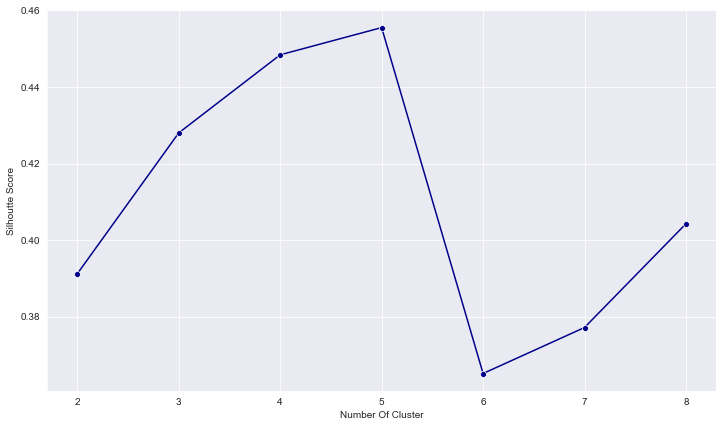

In [276]:
plt.figure(figsize = (12, 7))

sns.lineplot(x=number_of_clusters, y=score , color="darkblue",marker='o')
plt.xlabel("Number Of Cluster")
plt.ylabel('Silhoutte Score')
plt.show()



*   We will use 5 clusters because 5 clusters have the highest silhoutte score than 6






In [277]:
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(x_scaled)

rfm['label k-means'] = kmeans.labels_

In [278]:
label = rfm['label k-means']
score = silhouette_score(x_scaled, label, metric = 'euclidean')
score

0.4542082335930818

In [279]:
def label(x):
    if x == 0:
        return 'New Customer'
    elif x == 1:
        return 'Hibernating'
    elif x == 2:
        return 'Need to focus'
    elif x == 3:
        return 'Potential loyalists'
    else:
        return 'VIP'

rfm['label k-means'] = rfm['label k-means'].apply(label)

In [280]:
#counting the number of each types of customer
rfm['label k-means'].value_counts()

New Customer           34473
Hibernating            33918
Potential loyalists     2668
Need to focus           1588
VIP                      112
Name: label k-means, dtype: int64

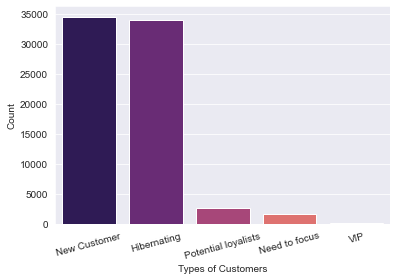

In [281]:
#plotting the count of each types of customers
plt.figure(figsize=(6, 4))
sns.countplot(x='label k-means', data=rfm, palette='magma')
plt.xlabel("Types of Customers")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

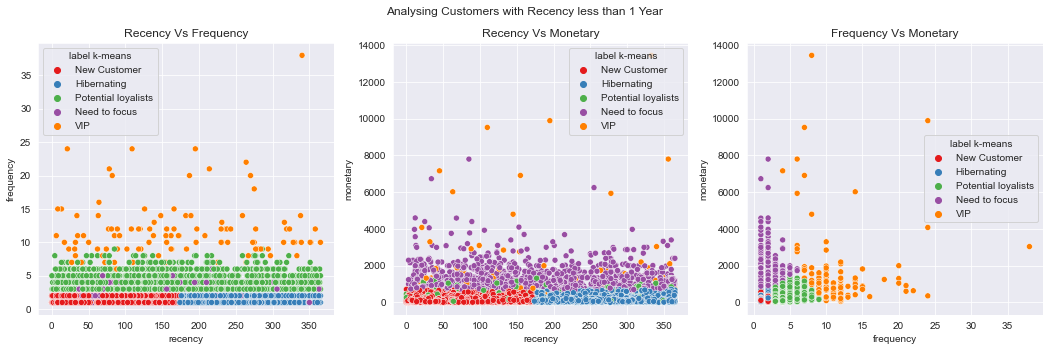

In [282]:
plt.figure(figsize =(18,5))

# Recency vs Frequency
plt.subplot(131)
sns.scatterplot(x = 'recency', y = 'frequency', hue = 'label k-means', data = rfm)
plt.title('Recency Vs Frequency')

# Recency Vs Monetary
plt.subplot(132)
sns.scatterplot(x = 'recency', y = 'monetary', hue = 'label k-means', data = rfm)
plt.title('Recency Vs Monetary')

# Frequency Vs Monetary
plt.subplot(133)
sns.scatterplot(x = 'frequency', y = 'monetary', hue = 'label k-means', data = rfm)
plt.title('Frequency Vs Monetary')

plt.suptitle('Analysing Customers with Recency less than 1 Year')
plt.show()

# **Recommendation System**

In [283]:
# load dataset
rec_data= pd.read_csv("rec_data.csv")

In [284]:
rec_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,19866247db89845ef558ef19a6c26fcd,5,NaN,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17 00:00:00,2018-02-18 23:24:14,4b86049cb99e4aa774031daa9cd18f18,20551,rio de janeiro,RJ
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,32921b4e09c9a19d61fe46ce04231b84,5,NaN,NaN,2018-07-14 00:00:00,2018-07-16 16:20:04,f63805d9c7edb84d92413af34b86a39c,5821,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,70949d129965fb1ee32aaccec720a19e,1,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07 00:00:00,2018-08-08 11:53:04,619e926d09b26efbd5180368b1ddc874,2018,sao paulo,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,74c9c7d0bc153bbbc92e4c1597b8ba55,5,NaN,NaN,2018-04-17 00:00:00,2018-04-18 04:29:47,ad353b4fb0e294adc4eda48af73e68a6,5835,sao paulo,SP


In [285]:
rec_data.shape

(112372, 32)

In [286]:
rec_df=rec_data[['customer_unique_id', 'product_id', 'review_score']]
rec_df.head()

,customer_unique_id,product_id,review_score
0,b1a1199364a4a7fe27c4486ab63f550d,1e9e8ef04dbcff4541ed26657ea517e5,5
1,4b86049cb99e4aa774031daa9cd18f18,3aa071139cb16b67ca9e5dea641aaa2f,5
2,f63805d9c7edb84d92413af34b86a39c,96bd76ec8810374ed1b65e291975717f,5
3,619e926d09b26efbd5180368b1ddc874,cef67bcfe19066a932b7673e239eb23d,1
4,ad353b4fb0e294adc4eda48af73e68a6,9dc1a7de274444849c219cff195d0b71,5


In [287]:
rec_data_rating = rec_df[rec_df['product_id'].isin(
    rec_df['product_id'].value_counts()[
        rec_df['product_id'].value_counts() > 10].index)]

rec_data_rating.reset_index(inplace=True)
rec_data_rating


,index,customer_unique_id,product_id,review_score
0,14,1dedbe50138a3540d30fe355776d2d6a,5aad359a63cbb4fc35ead44346a3eeb4,2
1,15,1dedbe50138a3540d30fe355776d2d6a,5aad359a63cbb4fc35ead44346a3eeb4,2
2,39,a518c60e2e7f3a2820b4ef5cf5107189,e0ce26ae52c9ab0b8c8e42129d6c1996,4
3,76,f9172a6495d46451776be8bc8e46032d,8ed094bfe076c568f6bb10feada3f75d,2
4,77,f9172a6495d46451776be8bc8e46032d,8ed094bfe076c568f6bb10feada3f75d,2
...,...,...,...,...
47569,112352,b1b03100d67e2c8e2a54945e5860496e,a0b7d5a992ccda646f2d34e418fff5a0,4
47570,112353,6f028dec6f26ff16182703be1453bfd4,a0b7d5a992ccda646f2d34e418fff5a0,2
47571,112354,d72a0b0a95a97197efb0d0d20978f6cc,a0b7d5a992ccda646f2d34e418fff5a0,1
47572,112355,806ab9e6d7c897da7e3b6104dadadc34,a0b7d5a992ccda646f2d34e418fff5a0,5


In [288]:
# create a pivot table
ratings_utility_matrix = rec_data_rating.pivot_table(values='review_score',
                                                  index='customer_unique_id',
                                                  columns='product_id',
                                                  fill_value=0)
ratings_utility_matrix.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,008cff0e5792219fae03e570f980b330,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00de7f393d962717eeeb2d7131a40dba,013ee64977aaa6b2b25475095162e0e9,014a8a503291921f7b004a5215bb3c36,0152f69b6cf919bcdaf117aa8c43e5a2,...,fe9dfbe7f974621789683b7b78be2a16,fecf6223a3494f35362f670e571d2a04,fed5c40c27e1c88560a9e92d82ee0825,ff29d8cb1cd0cd5ea37b80dac9939e1c,ff2c1ec09b1bb340e84f0d6b21cc7dbb,ff5f8606556b625613f069a5a9a48966,ff7fccf8513f360157f0660fe51d1d88,ffa7e0cbe11656d11a117b534bb1db27,ffaf0af7eebb57c7f262b51ebb05dfd6,ffc9caf33e2d1e9f44e3e06da19085f7
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0
00053a61a98854899e70ed204dd4bafe,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0
0005e1862207bf6ccc02e4228effd9a0,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0
0005ef4cd20d2893f0d9fbd94d3c0d97,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0
0006fdc98a402fceb4eb0ee528f6a8d4,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0


In [289]:
# transpose the above matrix

X = ratings_utility_matrix.T
X.head()

customer_unique_id,0000366f3b9a7992bf8c76cfdf3221e2,00053a61a98854899e70ed204dd4bafe,0005e1862207bf6ccc02e4228effd9a0,0005ef4cd20d2893f0d9fbd94d3c0d97,0006fdc98a402fceb4eb0ee528f6a8d4,00090324bbad0e9342388303bb71ba0a,000de6019bb59f34c099a907c151d855,000ed48ceeb6f4bf8ad021a10a3c7b43,0010fb34b966d44409382af9e8fd5b77,001147e649a7b1afd577e873841632dd,...,ffef0ffa736c7b3d9af741611089729b,fff1afc79f6b5db1e235a4a6c30ceda7,fff2ae16b99c6f3c785f0e052f2a9cfb,fff3a9369e4b7102fab406a334a678c3,fff7219c86179ca6441b8f37823ba3d3,fff96bc586f78b1f070da28c4977e810,fffbf87b7a1a6fa8b03f081c5f51a201,fffea47cd6d3cc0a88bd621562a9d061,ffff5962728ec6157033ef9805bacc48,ffffd2657e2aad2907e67c3e9daecbeb
product_id,,,,,,,,,,,,,,,,,,,,,
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00250175f79f584c14ab5cecd80553cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005030ef108f58b46b78116f754d8d38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
008cff0e5792219fae03e570f980b330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00ba6d766f0b1d7b78a5ce3e1e033263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, I am going to define a function to build a recommendation system. This function will fit the data into the model. This function build using the truncated SVD matrix reducing the components to 10. This function output will be a correlation matrix for product pairwisely.

In [290]:
def fitsystemrecommendation(ratings_utility_matrix):
    # Transpose
    X = ratings_utility_matrix.T
    SVD = TruncatedSVD(n_components=10)
    decomposed_matrix = SVD.fit_transform(X)
    # Calculate the correlation matrix 
    correlation_matrix = np.corrcoef(decomposed_matrix)
    
    return correlation_matrix

In [291]:
from sklearn.decomposition import TruncatedSVD

# call the function
correlation_matrix = fitsystemrecommendation(ratings_utility_matrix)

In [292]:
def systemrecommendation(prod_id):
    product_index = rec_data_rating.index[rec_data_rating['product_id'] == prod_id].tolist()[1]
    product_names = list(X.index)
    product_ID = product_names.index(prod_id)
    correlation_product_ID = correlation_matrix[product_ID]
    Recommend = list(X.index[correlation_product_ID > 0.70])
    Recommend.remove(prod_id)
    
    return pd.DataFrame(Recommend[0:9], columns=['Recommendation'])


In [293]:
# call the function with product id
systemrecommendation('ff2c1ec09b1bb340e84f0d6b21cc7dbb')


,Recommendation
0,00250175f79f584c14ab5cecd80553cd
1,044f05bc9de36e8a693a83e4bc79dd0d
2,04dc26a02c448f6f2b914f01c2902ebd
3,06c38a87544301cba8b0fb5a0796383d
4,092be1e8336fc404c57bd5970d056886
5,0bb7cb61f1957f79dac582ab66ccdc1f
6,0e34187d4312b97b5e698836d28ed040
7,0ec7b6a863e219792bc4d50d3a62a839
8,121f7f44c9e25be4873ca9296542ebd3


We can see the recommendation when we input product id: 'ff2c1ec09b1bb340e84f0d6b21cc7dbb'. By using the function I have defined, this recommendation have high correlation with the product. Therefore, I suggest the company to promote this recommendation product when the product inputted is purchased or viewed.

## Thank You

### Contributors
#### Adarsh Shukla And Ankit Kumar